<a href="https://colab.research.google.com/github/Kaiziferr/deep_learning/blob/master/multilayer_perceptron/07_workshop_learningrate_adaptative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [49]:
url = 'https://raw.githubusercontent.com/Kaiziferr/datasets/main/diabetes.csv'
data = pd.read_csv(url)

# **Split data**
---



In [50]:
data_values = data.values

In [51]:
X = data_values[:,:8].astype('float')
y = data_values[:,8]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size=0.8,
    shuffle=True,
    random_state=1254
)

In [53]:
encoder = LabelEncoder()
y_train_encoder = encoder.fit_transform(y_train)
y_test_encoder = encoder.transform(y_test)

In [54]:
estimator_scaler = StandardScaler()
X_train_scaler = estimator_scaler.fit_transform(X_train)
X_test_scaler = estimator_scaler.transform(X_test)

In [55]:
def optimization_learning_curves(
    history:dict,
    metrica:str,
    title:str='',
    X_size:int=8,
    y_size:int=4,
    font_size:int=15,
    X_label:str='Epoch',
    y_label:str='Loss'
)->None:
  """ Grafica curvas de aprendizaje """
  fig, ax = plt.subplots(figsize=(X_size, y_size))
  fig.suptitle(title, fontsize=font_size)
  ax.plot(history.history[metrica])
  ax.plot(history.history[f'val_{metrica}'])
  ax.set_xlabel(X_label, size = 12)
  ax.set_ylabel(y_label, size = 12)
  ax.legend(['Train', 'Test'], loc = 'upper right', fontsize = 12)
  ax.tick_params(labelsize = 12)
  fig.show()

# **Optimizador Adaptativo Adam**

---



In [56]:
model = Sequential()
model.add(Dense(1, input_dim = 8, activation='relu', kernel_initializer = 'glorot_uniform'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))

In [57]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam'
)

history = model.fit(
    X_train_scaler,
    y_train_encoder,
    validation_data=(X_test_scaler, y_test_encoder),
    epochs=100,
    batch_size=10,
    verbose = 1
)

Epoch 1/100
62/62 [==============================] - 1s 8ms/step - loss: 0.8394 - val_loss: 0.7517
Epoch 2/100
62/62 [==============================] - 0s 4ms/step - loss: 0.7969 - val_loss: 0.7239
Epoch 3/100
62/62 [==============================] - 0s 4ms/step - loss: 0.7633 - val_loss: 0.7021
Epoch 4/100
62/62 [==============================] - 0s 3ms/step - loss: 0.7370 - val_loss: 0.6863
Epoch 5/100
62/62 [==============================] - 0s 4ms/step - loss: 0.7163 - val_loss: 0.6742
Epoch 6/100
62/62 [==============================] - 0s 4ms/step - loss: 0.6999 - val_loss: 0.6645
Epoch 7/100
62/62 [==============================] - 0s 4ms/step - loss: 0.6871 - val_loss: 0.6575
Epoch 8/100
62/62 [==============================] - 0s 4ms/step - loss: 0.6773 - val_loss: 0.6517
Epoch 9/100
62/62 [==============================] - 0s 4ms/step - loss: 0.6685 - val_loss: 0.6473
Epoch 10/100
62/62 [==============================] - 0s 4ms/step - loss: 0.6615 - val_loss: 0.6429
Epoch 11/

In [58]:
len(X_train_scaler)/10

61.4

122.8 lotes con 5 muestras

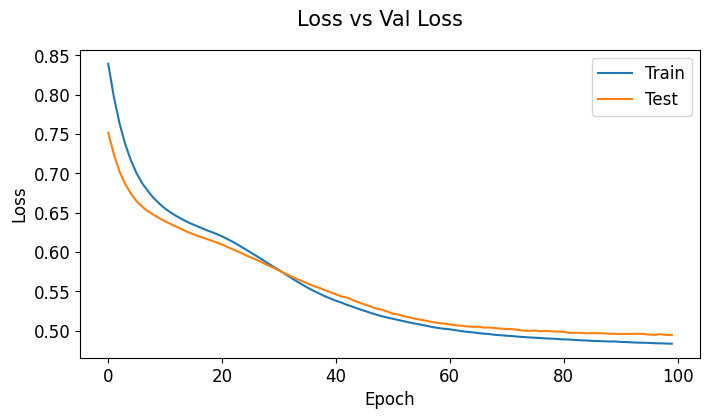

In [59]:
optimization_learning_curves(history, metrica='loss', title='Loss vs Val Loss')

# **Planificación de learning rate en función del tiempo**

---



In [ ]:
model2 = Sequential()
model2.add(Dense(1, input_dim=8, activation='relu', kernel_initializer='glorot_uniform'))
model2.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))

In [ ]:
epoch = 100
lr = 0.1
decay_rate = lr/epoch
momentum = 0.8

sgd = SGD(learning_rate=lr, momentum=momentum, decay = decay_rate, nesterov=False)
model2.compile(loss='binary_crossentropy', optimizer=sgd)

In [ ]:
history2 = model2.fit(X_train_scaler, y_train_encoder, validation_data=(X_test_scaler, y_test_encoder),
           epochs=epoch, batch_size=5, verbose = 1)

In [ ]:
optimization_learning_curves(history2, metrica='loss', title='Loss vs Val Loss')

# **Tasa de aprendizaje basado en caidas (drop)**

---



In [ ]:
def step_decay(epochs):
  intial_rate = 0.1
  drop = 0.5
  epochs_drop = 10
  lrate = intial_rate * np.power(drop, np.floor(1+epochs) / epochs_drop)
  return lrate

In [ ]:
model3 = Sequential()
model3.add(Dense(1, input_dim=8, activation='relu', kernel_initializer='glorot_uniform'))
model3.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))

In [ ]:
sgd = SGD(learning_rate=0.0, momentum = 0.9)
model3.compile(loss = 'binary_crossentropy', optimizer=sgd)

In [ ]:
lrate = LearningRateScheduler(step_decay)
callback_list = [lrate]

In [ ]:
history3 = model3.fit(X_train_scaler, y_train_encoder, validation_data=(X_test_scaler, y_test_encoder),
           epochs=100, batch_size=5, callbacks=callback_list, verbose=1)

In [ ]:
optimization_learning_curves(history3, metrica='loss', title='Loss vs Val Loss')

# **Notas**
---

- Incrementar la tasa de aprendizaje inicial, debido a que la tasa de aprendizaje disminuira, inicie con un valor mayor desde el cual disminuir

- Utilizar un gran momentum

- Experimente con diferentes planificacion

# **Concluciones**
---

- Se aprecia que en el método adam la reducción del error de entrenamiento se reduce a la par, que el error de validación.
- En el segundo y tercer método el error de entrenamiento se reduce más rápido que el de validación, con diferentes combinaciones de hiperparametros.

- Existe un overfiting. En el primer es menor en comparación a los ultmos metrodos

- Hay que investigar si el sobreaprendizaje del método de caídas drop y la planificación de learning rate en función del tiempo tiene relación con la reducción rápida del entrenamiento. Cabe resaltar que hay otros consideraciones a tener en cuenta, como el conjunto de datos, los hiperparametros entre otros. Con el adam es más estable el proceso, pero también se presenta overfiting, pero eso puede pasar por diversas razones.